In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as trtes
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv")
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
display (data.shape)

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

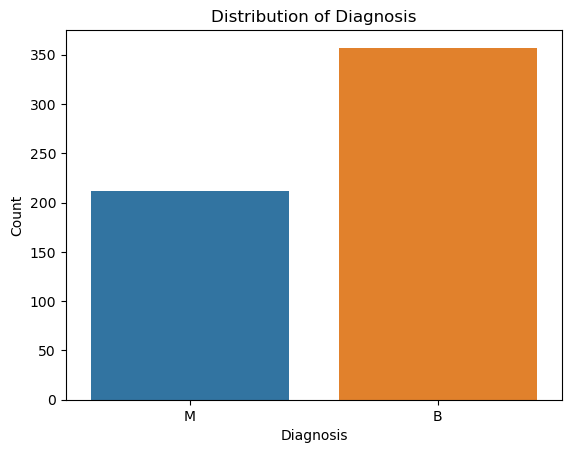

In [6]:
sns.countplot(data=data, x='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

In [7]:
label = LabelEncoder()
data['diagnosis'] = label.fit_transform(data['diagnosis'])

In [8]:
diagnosis_values = data['diagnosis'].head(20)
print(diagnosis_values)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis, dtype: int32


In [9]:
print("Mapping for 'diagnosis':")
print("'M' ->", label.transform(['M'])[0])
print("'B' ->", label.transform(['B'])[0])
data.head(10)

Mapping for 'diagnosis':
'M' -> 1
'B' -> 0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


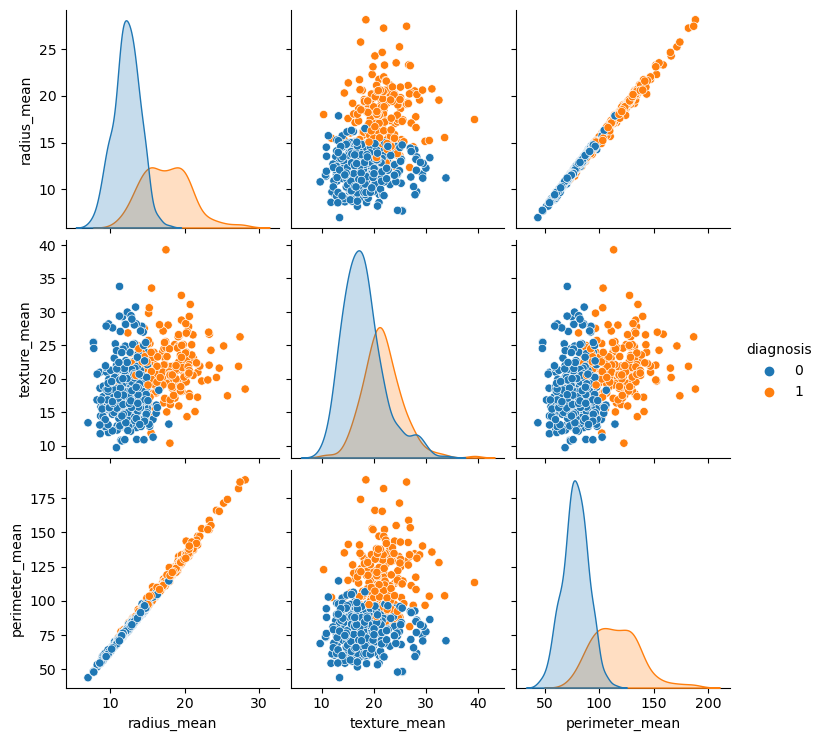

In [10]:
columns = data.iloc[:, 1:5]
sns.pairplot(columns ,hue = "diagnosis")
plt.show()

In [11]:
correlation = data.iloc[:, 1:31].corr()
print(correlation)

                        diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.730029      0.415185        0.742636   
radius_mean              0.730029     1.000000      0.323782        0.997855   
texture_mean             0.415185     0.323782      1.000000        0.329533   
perimeter_mean           0.742636     0.997855      0.329533        1.000000   
area_mean                0.708984     0.987357      0.321086        0.986507   
smoothness_mean          0.358560     0.170581     -0.023389        0.207278   
compactness_mean         0.596534     0.506124      0.236702        0.556936   
concavity_mean           0.696360     0.676764      0.302418        0.716136   
concave points_mean      0.776614     0.822529      0.293464        0.850977   
symmetry_mean            0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                0.567134     0.

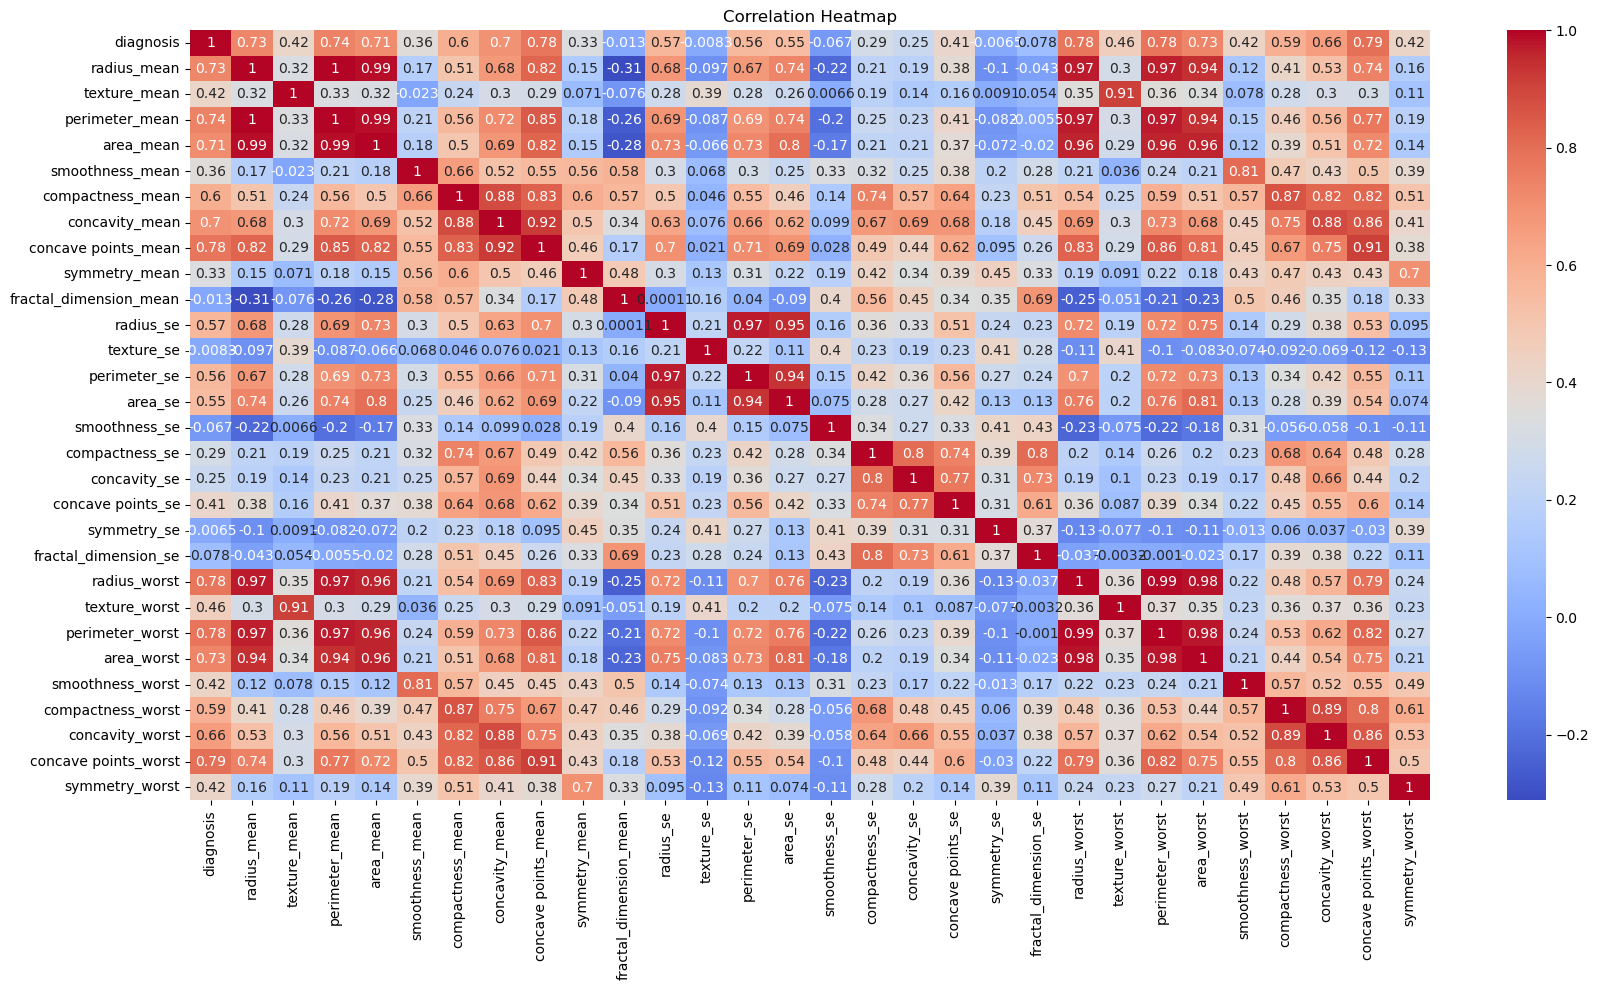

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

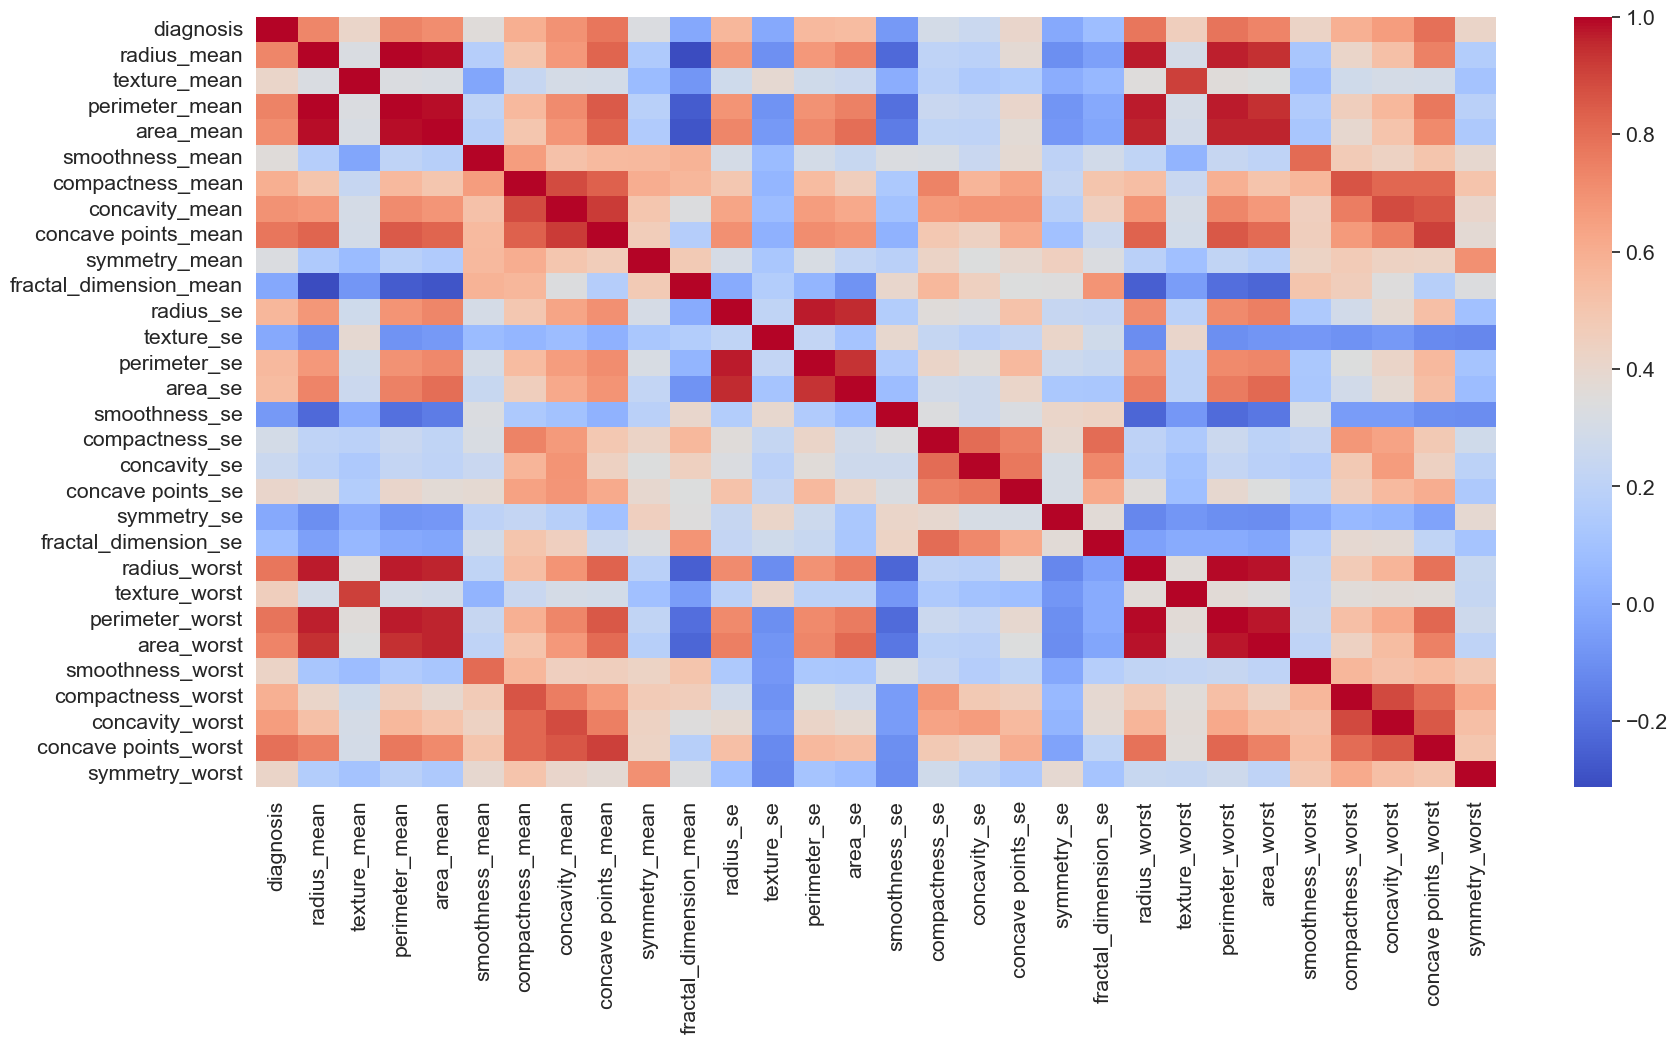

In [13]:
#or
plt.rcParams['figure.figsize']=(20,10)
sns.set(font_scale=1.4)
sns.heatmap (correlation,cmap = 'coolwarm',annot = None)
plt.show()

In [14]:
x=data.iloc[:,2:31].values
y=data.iloc[:,1].values

In [15]:
print(x)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [16]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [17]:
x_train, x_test, y_train, y_test = trtes(x, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
xtrain = scaler.fit_transform(x_train)
xtest = scaler.transform(x_test)
rfclassifier = RandomForestClassifier()
rfclassifier.fit(xtrain, y_train)
y_pred = rfclassifier.predict(xtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9707602339181286


In [18]:
#or

In [19]:
x_train, x_test, y_train, y_test = trtes(x, y, test_size=0.3, random_state=0)
rclassifier = RandomForestClassifier()
rclassifier.fit(x_train, y_train)
ypred = rclassifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9707602339181286


In [20]:
radius_mean = float(input("Enter the value of radius_mean= "))
texture_mean = float(input("Enter the value of texture_mean= "))
perimeter_mean = float(input("Enter the value of perimeter_mean= "))
area_mean = float(input("Enter the value of area_mean= "))
smoothness_mean = float(input("Enter the value of smoothness_mean= "))
compactness_mean = float(input("Enter the value of compactness_mean= "))
concavity_mean = float(input("Enter the value of concavity_mean= "))
concave_points_mean = float(input("Enter the value of concave_points_mean= "))
symmetry_mean = float(input("Enter the value of symmetry_mean= "))
fractal_dimension_mean = float(input("Enter the value of fractal_dimension_mean= "))
radius_se = float(input("Enter the value of radius_se= "))
texture_se = float(input("Enter the value of texture_se= "))
perimeter_se = float(input("Enter the value of perimeter_se= "))
area_se = float(input("Enter the value of area_se= "))
smoothness_se = float(input("Enter the value of smoothness_se= "))
compactness_se = float(input("Enter the value of compactness_se= "))
concavity_se = float(input("Enter the value of concavity_se="))
concave_points_se = float(input("Enter the value of concave_points_se="))
symmetry_se = float(input("Enter the value of symmetry_se= "))
fractal_dimension_se = float(input("Enter the value of fractal_dimension_se= "))
radius_worst = float(input("Enter the value of radius_worst= "))
texture_worst = float(input("Enter the value of texture_worst= "))
perimeter_worst = float(input("Enter the value of perimeter_worst= "))
area_worst = float(input("Enter the value of area_worst="))
smoothness_worst = float(input("Enter the value of smoothness_worst= "))
compactness_worst = float(input("Enter the value of compactness_worst= "))
concavity_worst = float(input("Enter the value of concavity_worst= "))
concave_points_worst = float(input("Enter the value of concave_points_worst="))
symmetry_worst = float(input("Enter the value of symmetry_worst= "))

input = [[radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst]]
prediction = rfclassifier.predict(input)
if prediction == 1:
    print("The person have breast cancer.")
else:
    print("The person don't have breast cancer.")

Enter the value of radius_mean= 7.99
Enter the value of texture_mean= 10.38
Enter the value of perimeter_mean= 122.8
Enter the value of area_mean= 1001
Enter the value of smoothness_mean= 0.1184
Enter the value of compactness_mean= 0.2776
Enter the value of concavity_mean= 0.3001
Enter the value of concave_points_mean= 0.1471
Enter the value of symmetry_mean= 0.2419
Enter the value of fractal_dimension_mean= 0.07871
Enter the value of radius_se= 1.095
Enter the value of texture_se= 0.9053
Enter the value of perimeter_se= 8.589
Enter the value of area_se= 153.4
Enter the value of smoothness_se= 0.006399
Enter the value of compactness_se= 0.04904
Enter the value of concavity_se=0.05373
Enter the value of concave_points_se=0.01587
Enter the value of symmetry_se= 0.03003
Enter the value of fractal_dimension_se= 0.006193
Enter the value of radius_worst= 25.38
Enter the value of texture_worst= 17.38
Enter the value of perimeter_worst= 17.38
Enter the value of area_worst=17.38
Enter the value